In [1]:
!type readme

SMS Spam Collection v.1
-------------------------

1. DESCRIPTION
--------------

The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

1.1. Compilation
----------------

This corpus has been collected from free or free for research sources at the Web:

- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Theses available 

In [2]:
!head SMSSpamCollection

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['class', 'message'])

In [5]:
df.shape

(5572, 2)

In [6]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
target = df['class']

In [8]:
target.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

In [9]:
target.unique()

array(['ham', 'spam'], dtype=object)

In [10]:
target.value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [11]:
import matplotlib.pyplot as plt

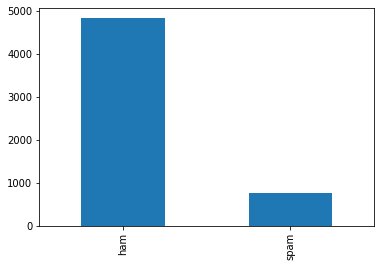

In [12]:
target.value_counts().plot(kind='bar')
plt.show()

In [13]:
features = df['message'].values.tolist()

In [14]:
len(features)

5572

In [15]:
features[:5]


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

In [17]:
punctuation = string.punctuation

In [21]:
total_words = []
def stop_word_remove(corpus, custom_stopwords=False):
    """
        This function just iterate all documents from corpus and convert them into lowercase letters for case insensitivity
        and also removes all stop words for documents
    """
    if custom_stopwords:
        stop_words = custom_stopwords
    else:
        stop_words = stopwords.words('english')
    stop_words.extend(['u', '2', 'im', 'ur', 'dont', '4', 'r', 'n', 'lol', 'lor', 'call', 'ok' ])
    processed_documents = []
    for each_document in corpus:
        each_document = each_document.strip().lower().split()
        words = []
        for word in each_document:
            word = word.strip().lower()
            new_word = []
            for char in word:
                if char not in punctuation and ord(char) < 130:
                    new_word.append(char)
            word = ''.join(new_word)
            if word  not in stop_words:
                words.append(word)
                total_words.append(word)
        processed_documents.append(' '.join(words))
    return processed_documents


In [22]:
messeges = stop_word_remove(features)

In [23]:
total_words = pd.Series(total_words)

In [24]:
print(total_words)

0               go
1           jurong
2            point
3            crazy
4        available
           ...    
49489           us
49490         free
49491         rofl
49492         true
49493         name
Length: 49494, dtype: object


In [25]:
messeges

['go jurong point crazy available bugis great world la e buffet cine got amore wat',
 'lar joking wif oni',
 'free entry wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s',
 'dun say early hor c already say',
 'nah think goes usf lives around though',
 'freemsg hey darling 3 weeks word back id like fun still tb xxx std chgs send 150 rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune',
 'winner valued network customer selected receivea 900 prize reward claim 09061701461 claim code kl341 valid 12 hours',
 'mobile 11 months entitled update latest colour mobiles camera free mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k ive cried enough today',
 'six chances win cash 100 20000 pounds txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl info',
 '

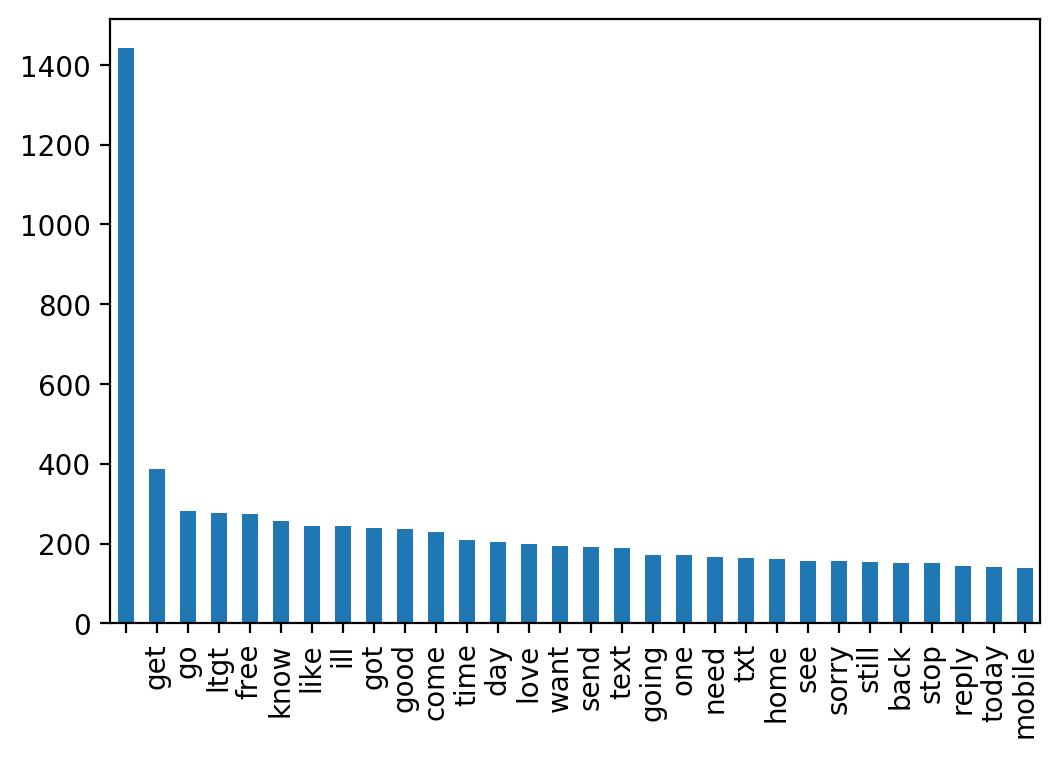

In [27]:
plt.figure(dpi=200)
total_words.value_counts()[:30].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer()

In [30]:
features = pd.DataFrame({
    'messeges': messeges
})

In [31]:
features.head(5)

,messeges
0,go jurong point crazy available bugis great wo...
1,lar joking wif oni
2,free entry wkly comp win fa cup final tkts 21s...
3,dun say early hor c already say
4,nah think goes usf lives around though


In [32]:
vectorizer.fit(messeges)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [33]:
len(vectorizer.vocabulary_)

9411

In [34]:
features = vectorizer.transform(messeges)

In [36]:
features.toarray().shape

(5572, 9411)

In [37]:
target.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

In [41]:
y_train.value_counts()

ham     3834
spam     623
Name: class, dtype: int64

In [42]:
y_test.value_counts()

ham     991
spam    124
Name: class, dtype: int64

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
model = MultinomialNB()

In [46]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
pred = model.predict(X_test)

In [48]:
y_test[:5].to_numpy()

array(['ham', 'ham', 'ham', 'ham', 'ham'], dtype=object)

In [49]:
pred[:5]

array(['ham', 'ham', 'ham', 'ham', 'ham'], dtype='<U4')

In [50]:
from sklearn import metrics

In [51]:
print("Accuracy Score: ", round(metrics.accuracy_score(y_test, pred)*100, 2))

Accuracy Score:  97.58


In [52]:
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[973  18]
 [  9 115]]


In [53]:
new_messegs = [
    
    'free free free join today for free !@#^%',
    'hey i need your help can you come over my house',
    'lets check wheater i am spam or ham'
]

In [55]:
total_words = []
def stop_word_remove(corpus, custom_stopwords=False):
    """
        This function just iterate all documents from corpus and convert them into lowercase letters for case insensitivity
        and also removes all stop words for documents
    """
    if custom_stopwords:
        stop_words = custom_stopwords
    else:
        stop_words = stopwords.words('english')
    stop_words.extend(['u', '2', 'im', 'ur', 'dont', '4', 'r', 'n', 'lol', 'lor', 'call', 'ok', 'get' ])
    processed_documents = []
    for each_document in corpus:
        each_document = each_document.strip().lower().split()
        words = []
        for word in each_document:
            word = word.strip().lower()
            new_word = []
            for char in word:
                if char not in punctuation and ord(char) < 130:
                    new_word.append(char)
            word = ''.join(new_word)
            if word and word not in stop_words:
                words.append(word)
        processed_documents.append(' '.join(words))
    return processed_documents  

In [56]:
new_messegs = stop_word_remove(new_messegs)

In [57]:
new_vectors = vectorizer.transform(new_messegs)

In [58]:
print(new_messegs)

['free free free join today free', 'hey need help come house', 'lets check wheater spam ham']


In [59]:
print(model.predict(new_vectors))

['spam' 'ham' 'ham']
